# **Project: Insurance Cost Analysis**


In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|


## Objectives 
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [30]:
import pandas as pd 
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split


In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

# Import the dataset

Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file. 

Print the first 10 rows of the dataframe to confirm successful loading.


In [5]:
df = pd.read_csv(path, header = None)
print(df.head())

    0  1       2  3  4  5            6
0  19  1  27.900  0  1  3  16884.92400
1  18  2  33.770  1  0  4   1725.55230
2  28  2  33.000  3  0  4   4449.46200
3  33  2  22.705  0  0  1  21984.47061
4  32  2  28.880  0  0  1   3866.85520


<details>
    <summary>Click here for Solution</summary>

```python
df = pd.read_csv(path, header=None)
print(df.head(10))
```

</details>


Add the headers to the dataframe, as mentioned in the project scenario. 


In [53]:
header = 'Age','Gender', 'Body_mass_index', 'No._of_Children', 'Smoker',' Region', ' Charges'
df.columns = header
print(df.head())

   Age  Gender  Body_mass_index  No._of_Children  Smoker   Region   Charges
0    1       1           27.900                0      19        3  16884.92
1    0       2           33.770                1      18        4   1725.55
2    0       2           33.000                3      28        4   4449.46
3    0       2           22.705                0      33        1  21984.47
4    0       2           28.880                0      32        1   3866.86


Now, replacing the '?' entries with 'NaN' values.


In [54]:
df.replace('?', np.nan, inplace = True)

# Data Wrangling


Use `dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.


In [55]:
print(df.info())
print(df.isnull().values.any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              2772 non-null   int64  
 1   Gender           2772 non-null   int64  
 2   Body_mass_index  2772 non-null   float64
 3   No._of_Children  2772 non-null   int64  
 4   Smoker           2772 non-null   int64  
 5    Region          2772 non-null   int64  
 6    Charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None
False


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [56]:
# replace with the most frequent value as smoker is categorial attribute
is_smoker = df['Smoker'].value_counts().idxmax()
df["Smoker"].replace(np.nan, is_smoker)
# replace with the mean value as Age is continuous Variable 
df['Age'] = df["Age"].astype("float")
mean_age = df['Age'].mean(axis= 0)
df["Age"].replace(np.nan, mean_age)

# replace data type as int
df[["Smoker", "Age"]] = df[["Age", "Smoker"]].astype("int")
print(df.head())



   Age  Gender  Body_mass_index  No._of_Children  Smoker   Region   Charges
0   19       1           27.900                0       1        3  16884.92
1   18       2           33.770                1       0        4   1725.55
2   28       2           33.000                3       0        4   4449.46
3   33       2           22.705                0       0        1  21984.47
4   32       2           28.880                0       0        1   3866.86


Here`charges` column has values which are more than 2 decimal places long.  So Updated the `charges` column such that all values are rounded to nearest 2 decimal places. 


Remove leading/trailing spaces from all column names

In [57]:
df.columns = df.columns.str.strip()


In [58]:
df["Charges"] = np.round(df["Charges"],2)
print(df.head())

   Age  Gender  Body_mass_index  No._of_Children  Smoker  Region   Charges
0   19       1           27.900                0       1       3  16884.92
1   18       2           33.770                1       0       4   1725.55
2   28       2           33.000                3       0       4   4449.46
3   33       2           22.705                0       0       1  21984.47
4   32       2           28.880                0       0       1   3866.86


# Exploratory Data Analysis (EDA)

Implemented the regression plot for `charges` with respect to `bmi`. 


(0.0, 66902.85800000001)

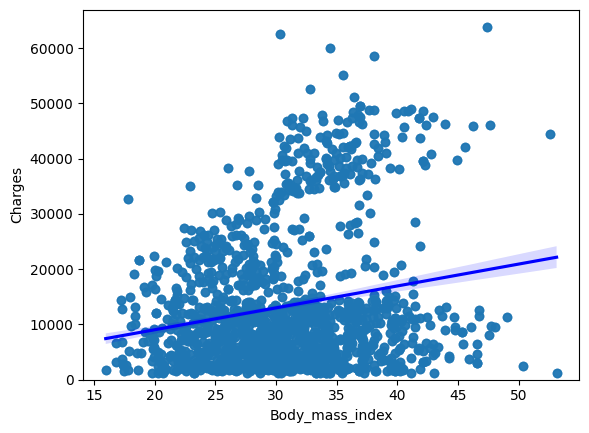

In [59]:
sns.regplot(x= "Body_mass_index", y="Charges", data = df, line_kws= {"color": "blue"})
plt.ylim(0,)   #Set the minimum y-axis value to 0

Implemented the box plot for `charges` with respect to `smoker`.


<Axes: xlabel='Smoker', ylabel='Charges'>

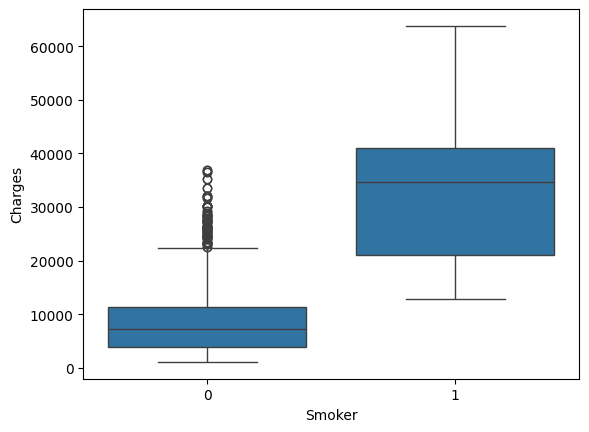

In [60]:
sns.boxplot(x="Smoker", y= "Charges", data = df)

Print the correlation matrix for the dataset.


In [61]:
print(df.corr())

                      Age    Gender  Body_mass_index  No._of_Children  \
Age              1.000000 -0.026046         0.113048         0.037574   
Gender          -0.026046  1.000000         0.042924         0.016020   
Body_mass_index  0.113048  0.042924         1.000000        -0.001492   
No._of_Children  0.037574  0.016020        -0.001492         1.000000   
Smoker          -0.023286  0.082326         0.011489         0.006362   
Region          -0.007167  0.022213         0.271119        -0.025717   
Charges          0.298624  0.062837         0.199846         0.066442   

                   Smoker    Region   Charges  
Age             -0.023286 -0.007167  0.298624  
Gender           0.082326  0.022213  0.062837  
Body_mass_index  0.011489  0.271119  0.199846  
No._of_Children  0.006362 -0.025717  0.066442  
Smoker           1.000000  0.054077  0.788783  
Region           0.054077  1.000000  0.054058  
Charges          0.788783  0.054058  1.000000  


# Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [62]:
X= df[["Smoker"]]
Y = df[["Charges"]]
lm= LinearRegression()
lm.fit(X,Y)
print(lm.score(X,Y))

0.6221791733924185


Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. To see an improvement in the performance.


In [63]:
Z= df[["Age", "Gender","Body_mass_index","No._of_Children","Smoker", "Region"]]
lm.fit(Z,Y)
print(lm.score(Z,Y))

0.7504083820289634


Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [66]:
Input = [('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
Z= Z.astype(float)
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)
print(r2_score(Y, ypipe))

0.8452576213500093


# Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [78]:
x_train,x_test,y_train, y_test = train_test_split(Z,Y, test_size= 0.2, random_state =1)

Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [79]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807731582404


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [83]:
pr = PolynomialFeatures(degree =2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test, y_hat))

0.7835631107608146
